In [22]:
import sys
import os
sys.path.append(os.path.abspath(".."))  

import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, roc_auc_score, roc_curve,
    precision_recall_curve, average_precision_score
)
from src.evaluation.metrics import evaluate_model



In [2]:
df = pd.read_csv("../data/processed/creditcard_cleaned.csv")
X = df.drop("Class", axis=1)
y = df["Class"]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [6]:
models = {
    "Logistic Regression": joblib.load("../models/logistic_regression.pkl"),
    "Random Forest": joblib.load("../models/random_forest.pkl"),
    "XGBoost": joblib.load("../models/xgboost.pkl")
}

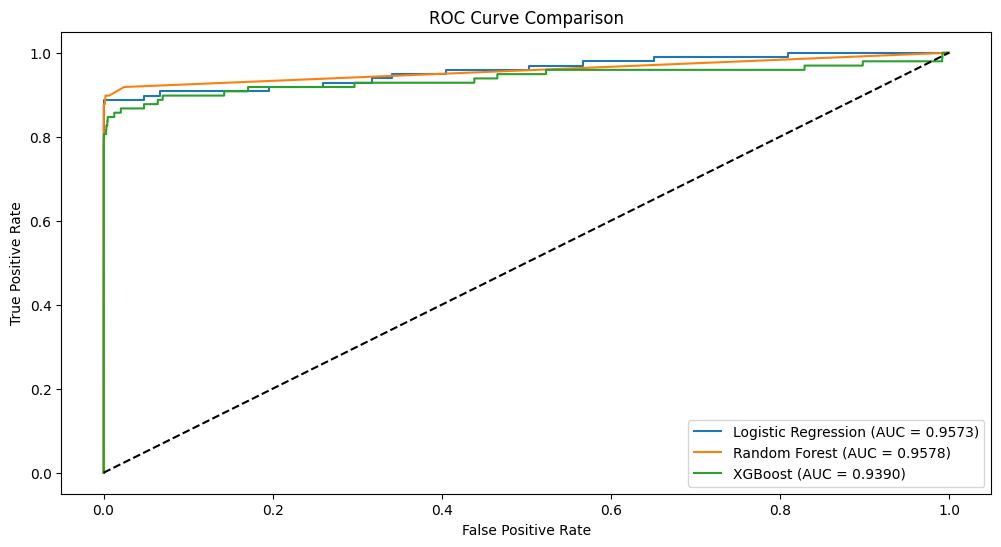

In [7]:
plt.figure(figsize=(12, 6))
for name, model in models.items():
    proba = model.predict_proba(X_test)[:, 1]
    preds = model.predict(X_test)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, proba):.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

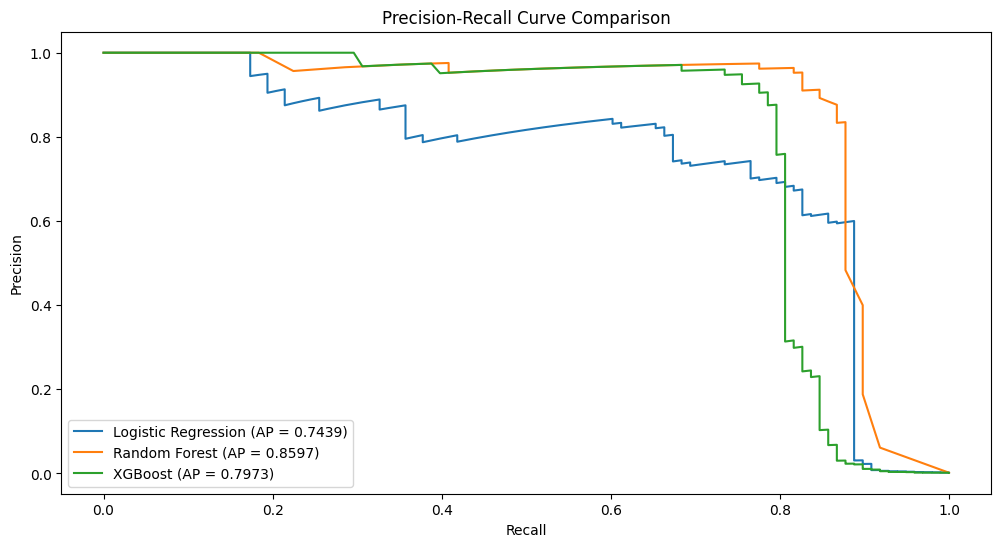

In [8]:
plt.figure(figsize=(12, 6))
for name, model in models.items():
    proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, proba)
    pr_auc = average_precision_score(y_test, proba)
    plt.plot(recall, precision, label=f"{name} (AP = {pr_auc:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.show()

In [9]:
for name, model in models.items():
    preds = model.predict(X_test)
    print(f"\n🧠 {name} Classification Report:\n")
    print(classification_report(y_test, preds, digits=4))


🧠 Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8289    0.6429    0.7241        98

    accuracy                         0.9992     56962
   macro avg     0.9142    0.8213    0.8619     56962
weighted avg     0.9991    0.9992    0.9991     56962


🧠 Random Forest Classification Report:

              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9529    0.8265    0.8852        98

    accuracy                         0.9996     56962
   macro avg     0.9763    0.9132    0.9425     56962
weighted avg     0.9996    0.9996    0.9996     56962


🧠 XGBoost Classification Report:

              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56864
           1     0.8667    0.7959    0.8298        98

    accuracy                         0.9994     56962
   ma

In [13]:
df = pd.read_csv("../data/processed/creditcard_cleaned.csv")
X = df.drop("Class", axis=1)
y = df["Class"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [15]:
ensemble = joblib.load("../models/ensemble_smote.pkl")

In [16]:
y_pred = ensemble.predict(X_test)
y_pred_prob = ensemble.predict_proba(X_test)[:, 1]

📊 Model: Ensemble w/ SMOTE
              precision    recall  f1-score   support

           0     0.9998    0.9994    0.9996     56864
           1     0.7167    0.8776    0.7890        98

    accuracy                         0.9992     56962
   macro avg     0.8582    0.9385    0.8943     56962
weighted avg     0.9993    0.9992    0.9992     56962

ROC-AUC: 0.9742


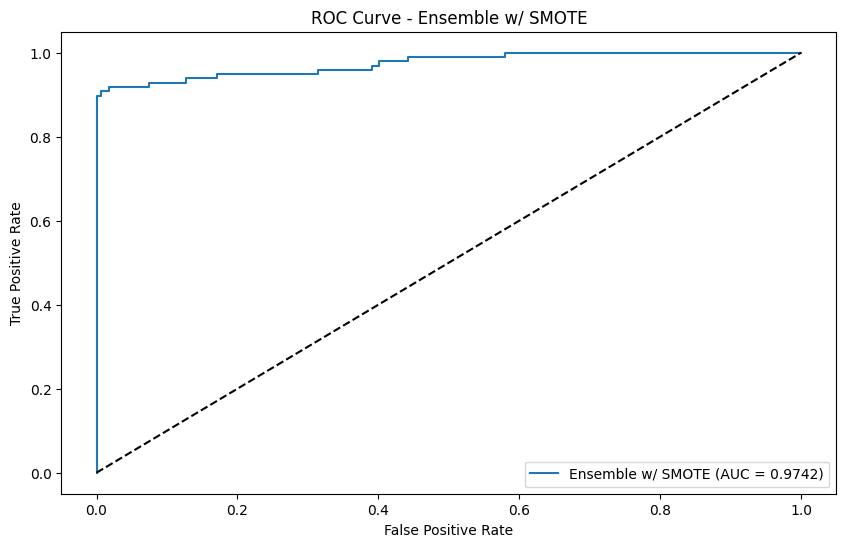

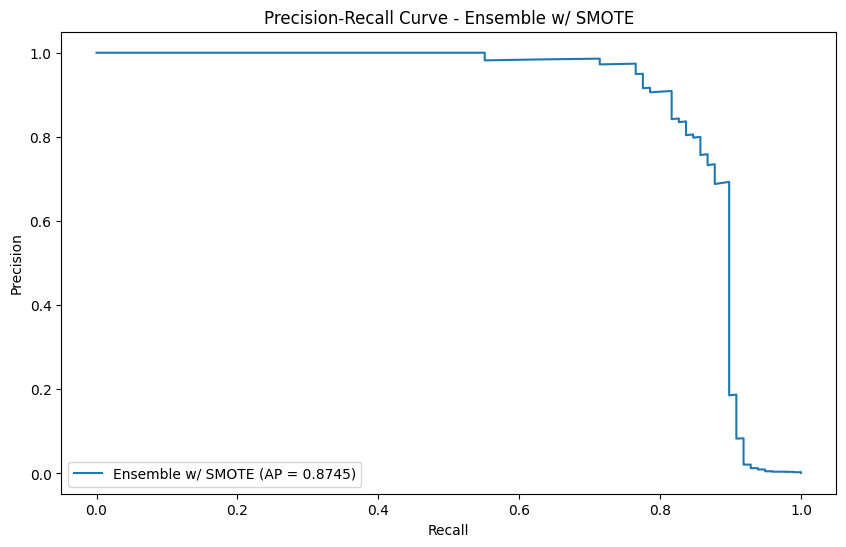

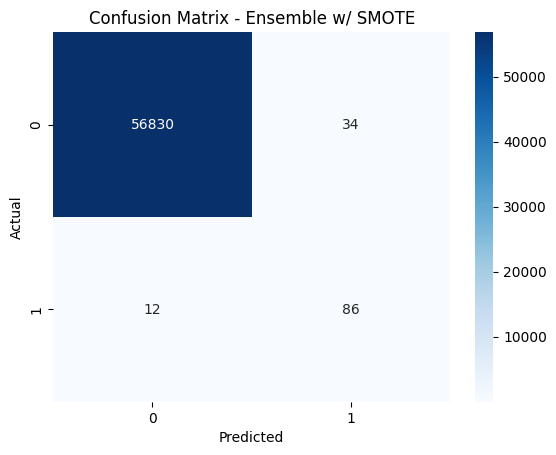

In [17]:
evaluate_model(y_test, y_pred, y_pred_prob, "Ensemble w/ SMOTE")